In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats
import geopandas as gpd
import plotly.express as px

In [19]:
# Step 1: Load data from Excel file
file_path = r'Resources/Wine_Country_Weather_Data_adj.xlsx' 
wine_country_weather_data_df = pd.read_excel(file_path, sheet_name='Table')

# Step 2: Display the first few rows of the DataFrame to verify loading
wine_country_weather_data_df.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Country_Code,DP10,DP1X,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0,AF,0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


In [20]:
# Load data from Excel file
file_path = r'Resources/Wine_Country_Weather_Data_adj.xlsx' 
glossary_df = pd.read_excel(file_path, sheet_name='Glossary')

# Adjust display options to show entire strings
pd.set_option('display.max_colwidth', 60)

# Display the first few rows of the glossary dataframe
glossary_df

,DataType,Definition
0,DP10,Number of days with >= 0.1 inch
1,DP1X,Number of days with >= 1.00 inch
2,DT32,Number of days with maximum temperature <= 32 degrees Fa...
3,DX70,Number of days with maximum temperature >= 70 degrees Fa...
4,DX90,Number of days with maximum temperature >= 90 degrees Fa...
5,EMNT,Extreme minimum temperature for month. Lowest daily mini...
6,EMXP,Highest daily total of precipitation in the month. Given...
7,EMXT,Extreme maximum temperature for month. Highest daily max...
8,HTDD,Heating Degree Days. Computed when daily average tempera...
9,MNPN,Monthly Mean Minimum Temperature of evaporation pan wate...


In [17]:
# Convert quantity from 1000hl to gallons
# Assuming the quantity column is named 'quantity' and it is in '1000hl'
# 1 hectoliter (hl) is approximately 26.4172 gallons
# Therefore, 1000 hl is 1000 * 26.4172 gallons

conversion_factor = 26.4172
wine_country_weather_data_df['Quantity_gallons'] = wine_country_weather_data_df['Quantity'].astype(float) * 1000 * conversion_factor

# Reorder columns to place 'Quantity_Gallons' right after 'Quantity'
columns = list(wine_country_weather_data_df.columns)
quantity_index = columns.index('Quantity')
columns.insert(quantity_index + 1, columns.pop(columns.index('Quantity_gallons')))
wine_country_weather_data_final_df = wine_country_weather_data_df[columns]

# Remove blank records where country_code is blank
wine_country_weather_data_final_df = wine_country_weather_data_final_df[wine_country_weather_data_final_df['Country_Code'].notna()].reset_index(drop=True)

# Display the modified dataframe
# print(wine_country_weather_data_final_df.head())
wine_country_weather_data_final_df.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Quantity_gallons,Country_Code,DP10,...,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0,0.0,AF,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


Total wine production for all countries combined from 1995 to 2023

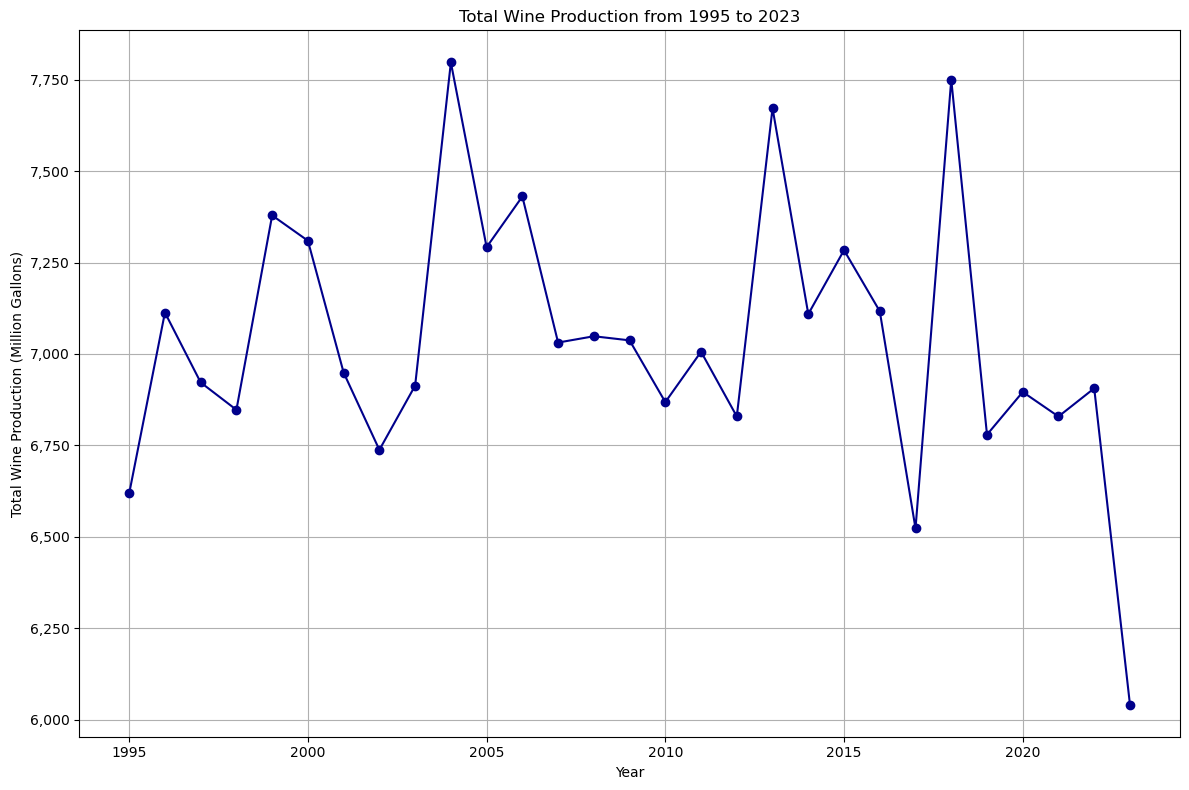

In [7]:
# Filter the data to include only wine production records
wine_production_df = wine_country_weather_data_final_df[wine_country_weather_data_final_df['Variable'] == 'Production']

# Group by Year and sum the Quantity_gallons
wine_production_by_year = wine_production_df.groupby('Year')['Quantity_gallons'].sum().reset_index()

# Convert the Quantity_gallons to millions
wine_production_by_year['Quantity_gallons_million'] = wine_production_by_year['Quantity_gallons'] / 1e6

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(wine_production_by_year['Year'], wine_production_by_year['Quantity_gallons_million'], marker='o', linestyle='-', color='darkblue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total Wine Production (Million Gallons)')
plt.title('Total Wine Production from 1995 to 2023')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Map of total wine production by country in 1995

In [13]:
# Filter the data to include only wine production records and for the year 1995
wine_production_1995_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_1995_by_country = wine_production_1995_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    wine_production_1995_by_country,
    locations="Region/Country",
    locationmode="country names",
    color="Quantity_gallons",
    hover_name="Region/Country",
    color_continuous_scale=px.colors.sequential.OrRd,
    labels={'Quantity_gallons': 'Total Wine Production (Gallons)'},
    title='Total Wine Production by Country in 1995'
)

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the plot
fig.show()

Map of total wine production by country in 2023

In [16]:
#  Filter the data to include only wine production records and for the year 2023
wine_production_2023_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 2023)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_2023_by_country = wine_production_2023_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    wine_production_2023_by_country,
    locations="Region/Country",
    locationmode="country names",
    color="Quantity_gallons",
    hover_name="Region/Country",
    color_continuous_scale=px.colors.sequential.OrRd,
    labels={'Quantity_gallons': 'Total Wine Production (Gallons)'},
    title='Total Wine Production by Country in 2023'
)

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the plot
fig.show()

Which were the top wine producing countries from year 1995?


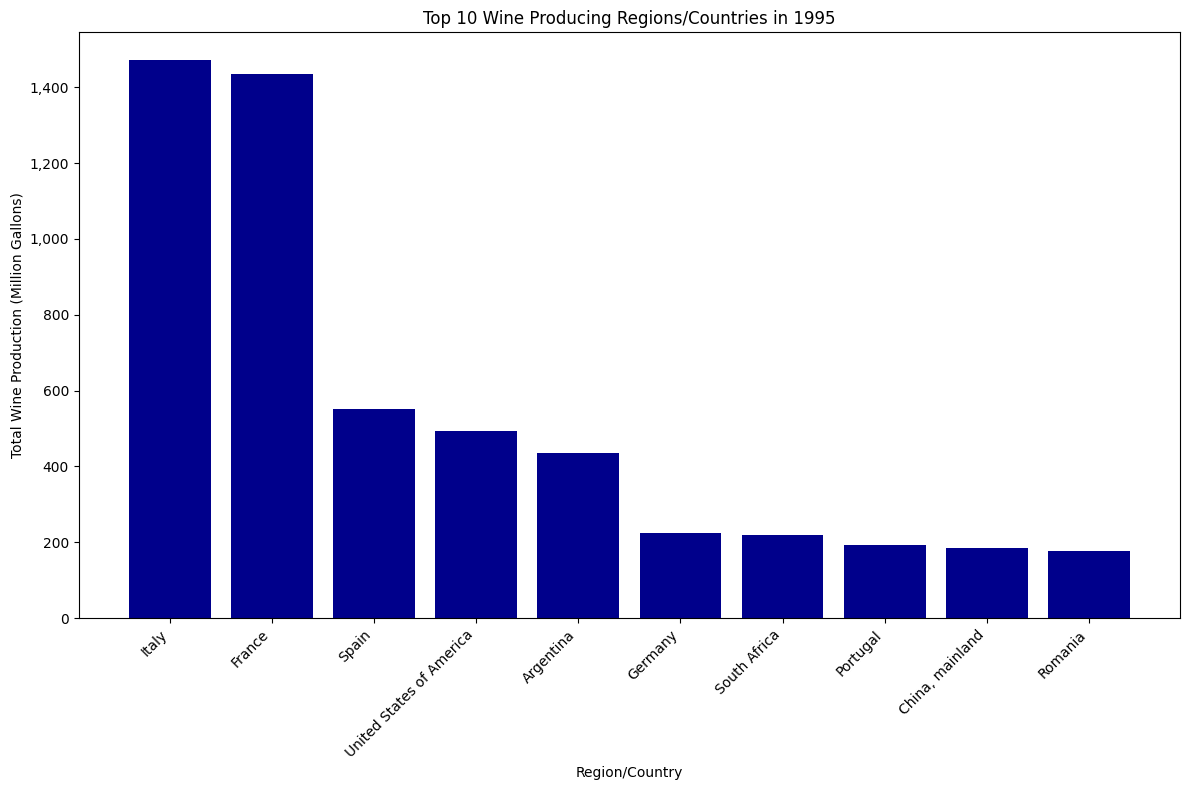

In [52]:
# Filter the data to include only wine production records and for the year 1995
wine_production_df = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Group by Region/Country and sum the Quantity_gallons
wine_production_by_region = wine_production_df.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Convert the Quantity_gallons to millions
wine_production_by_region['Quantity_gallons_million'] = wine_production_by_region['Quantity_gallons'] / 1e6

# Sort the values in descending order and get the top 10
top_10_wine_producing_regions = wine_production_by_region.sort_values(by='Quantity_gallons_million', ascending=False).head(10)

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Quantity_gallons_million'], color='darkblue')
plt.xlabel('Region/Country')
plt.ylabel('Total Wine Production (Million Gallons)')
plt.title('Top 10 Wine Producing Regions/Countries in 1995')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

Which were the top wine producing countries from year 2023?


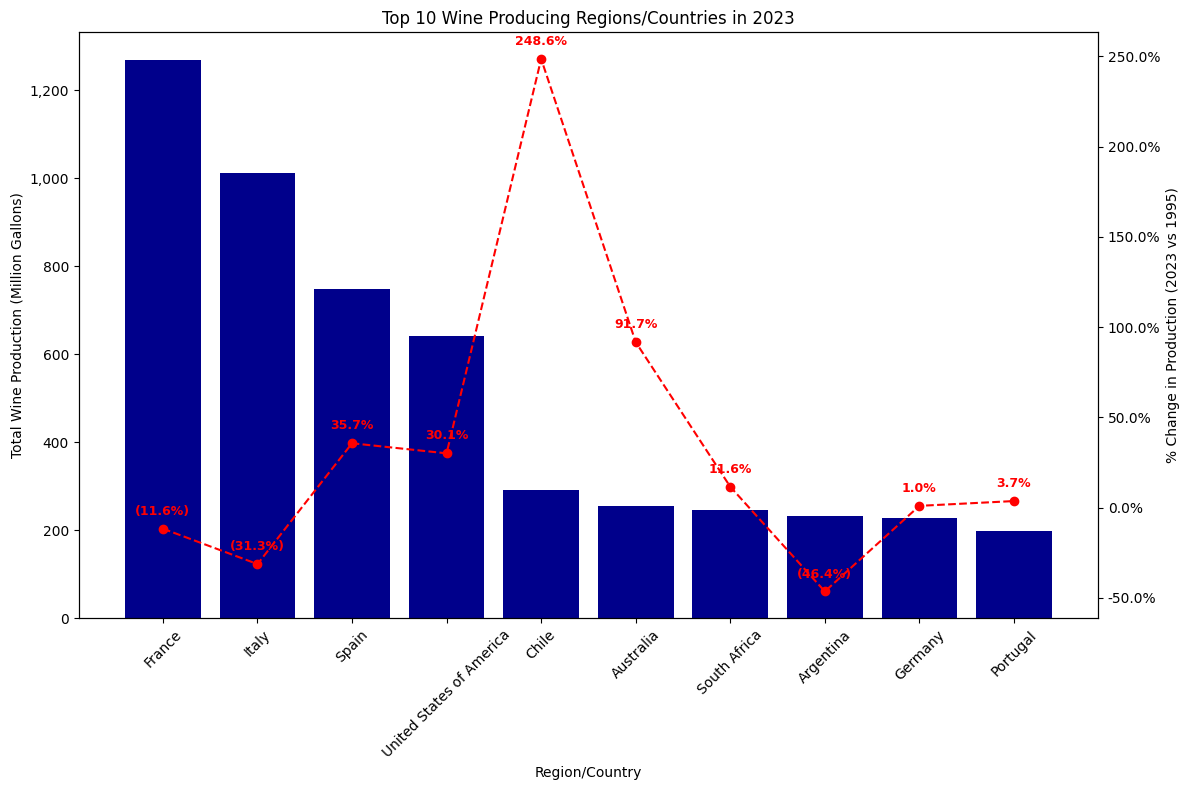

In [51]:
# Filter the data to include only wine production records and for the year 1995
wine_production_df_1995 = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 1995)]

# Filter the data to include only wine production records and for the year 2023
wine_production_df_2023 = wine_country_weather_data_final_df[(wine_country_weather_data_final_df['Variable'] == 'Production') & (wine_country_weather_data_final_df['Year'] == 2023)]

# Group by Region/Country and sum the Quantity_gallons for 1995 and 2023
wine_production_by_region_1995 = wine_production_df_1995.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()
wine_production_by_region_2023 = wine_production_df_2023.groupby('Region/Country')['Quantity_gallons'].sum().reset_index()

# Merge the two dataframes on Region/Country
wine_production_comparison = pd.merge(wine_production_by_region_1995, wine_production_by_region_2023, on='Region/Country', suffixes=('_1995', '_2023'))

# Calculate the percentage change
wine_production_comparison['Percentage_change'] = ((wine_production_comparison['Quantity_gallons_2023'] - wine_production_comparison['Quantity_gallons_1995']) / wine_production_comparison['Quantity_gallons_1995']) * 100

# Convert the Quantity_gallons_2023 to millions for plotting
wine_production_comparison['Quantity_gallons_2023_million'] = wine_production_comparison['Quantity_gallons_2023'] / 1e6

# Sort the values in descending order and get the top 10
top_10_wine_producing_regions = wine_production_comparison.sort_values(by='Quantity_gallons_2023_million', ascending=False).head(10)

# Define a function to format the y-axis values with thousand commas
def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Define a function to format the percentage change values with one decimal place
def percentage_formatter(x, pos):
    return f'{x:,.1f}%'

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Quantity_gallons_2023_million'], color='darkblue')
ax1.set_xlabel('Region/Country')
ax1.set_ylabel('Total Wine Production (Million Gallons)')
ax1.set_title('Top 10 Wine Producing Regions/Countries in 2023')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.tick_params(axis='x', rotation=45)

# Create the secondary axis
ax2 = ax1.twinx()
ax2.plot(top_10_wine_producing_regions['Region/Country'], top_10_wine_producing_regions['Percentage_change'], color='red', marker='o', linestyle='--')
ax2.set_ylabel('% Change in Production (2023 vs 1995)')
ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Add data labels to the line graph
for i, txt in enumerate(top_10_wine_producing_regions['Percentage_change']):
    label = f'{txt:.1f}%' if txt >= 0 else f'({-txt:.1f}%)'
    ax2.annotate(label, (top_10_wine_producing_regions['Region/Country'].iloc[i], top_10_wine_producing_regions['Percentage_change'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red', fontweight='bold')

plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()